<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, GlobalMaxPooling2D, Input, Flatten
from tensorflow.keras.models import Model

# Loading and scaling the Data

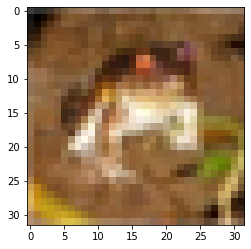

In [35]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255
x_test = x_test/255

plt.imshow(x_train[0])

# Flattening Target

In [36]:
# We need to Flatten the targets as that is what the model expects to have.
y_train = y_train.flatten()
y_test = y_test.flatten()

y_train.shape

(50000,)

# Retrieving the number of Classes

In [37]:
K = len(set(y_train))
K

10

# Creating the Model

In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

# Compiling the Model

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the model

In [43]:
r = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4341 - accuracy: 0.4791 - val_loss: 1.3193 - val_accuracy: 0.5357
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2316 - accuracy: 0.5577 - val_loss: 1.1371 - val_accuracy: 0.5871
Epoch 3/15
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1100 - accuracy: 0.6009 - val_loss: 0.9852 - val_accuracy: 0.6541
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0170 - accuracy: 0.6377 - val_loss: 0.9329 - val_accuracy: 0.6737
Epoch 5/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9438 - accuracy: 0.6640 - val_loss: 0.9496 - val_accuracy: 0.6617
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8834 - accuracy: 0.6868 - val_loss: 0.8860 - val_accuracy: 0.6964
Epoch 7/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8312 - accuracy: 0.7062 - val_loss: 0.8373 -

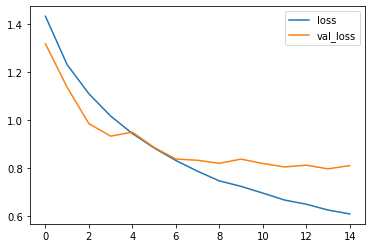

In [47]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss');
plt.legend();

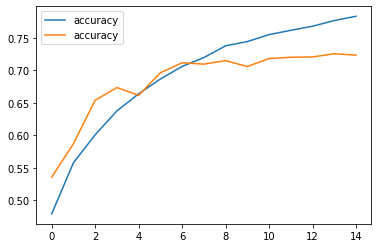

In [48]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'accuracy');
plt.legend();

Confusion matrix, without normalization
[[749  22  45  19  28   4  10   8  78  37]
 [  8 871   4   4   2   2  14   4  22  69]
 [ 56   7 587  91  65  59  89  26  10  10]
 [ 23  12  50 594  53 126  82  34   9  17]
 [ 23   4  66  82 652  29  90  44   7   3]
 [ 16   6  44 246  37 558  45  35   6   7]
 [  4   8  20  67  23  12 851   5   6   4]
 [ 19   3  27  72  60  50  12 737   2  18]
 [ 36  29   8  21  10   7   9   3 850  27]
 [ 30  98   8  18   3  10  12  12  22 787]]


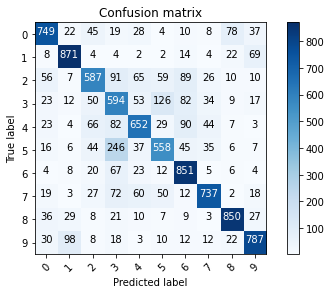

In [49]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

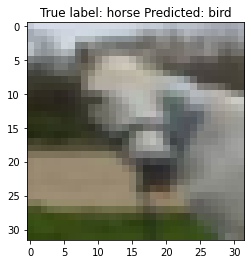

In [53]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));